In [ ]:
#This is an attempt to forecast stck prices using an encoder-decoder architecture

In [1]:
#Import all the necessary libraries

import numpy as np
#from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('path-to-your-data-file.csv', header=None)
df

,0,1,2,3,4,5
0,日期,开盘价,最高价,最低价,收盘价,成交量
1,Date,open,high,low,close,volume
2,2015-01-05,5.0487,5.0487,5.0487,5.0487,0.0000
3,2015-01-06,5.0487,5.0487,5.0487,5.0487,0.0000
4,2015-01-07,5.0487,5.0487,5.0487,5.0487,0.0000
5,2015-01-08,5.0487,5.0487,5.0487,5.0487,0.0000
6,2015-01-09,5.0487,5.0487,5.0487,5.0487,0.0000
7,2015-01-12,5.0487,5.0487,5.0487,5.0487,0.0000
8,2015-01-13,5.0487,5.0487,5.0487,5.0487,0.0000
9,2015-01-14,5.0487,5.0487,5.0487,5.0487,0.0000


In [3]:
df=df.drop([0])
df

,0,1,2,3,4,5
1,Date,open,high,low,close,volume
2,2015-01-05,5.0487,5.0487,5.0487,5.0487,0.0000
3,2015-01-06,5.0487,5.0487,5.0487,5.0487,0.0000
4,2015-01-07,5.0487,5.0487,5.0487,5.0487,0.0000
5,2015-01-08,5.0487,5.0487,5.0487,5.0487,0.0000
6,2015-01-09,5.0487,5.0487,5.0487,5.0487,0.0000
7,2015-01-12,5.0487,5.0487,5.0487,5.0487,0.0000
8,2015-01-13,5.0487,5.0487,5.0487,5.0487,0.0000
9,2015-01-14,5.0487,5.0487,5.0487,5.0487,0.0000
10,2015-01-15,5.0487,5.0487,5.0487,5.0487,0.0000


In [4]:
df=pd.DataFrame(df.values, columns=['Date', 'open','high','low','close','volume'])
df

,Date,open,high,low,close,volume
0,Date,open,high,low,close,volume
1,2015-01-05,5.0487,5.0487,5.0487,5.0487,0.0000
2,2015-01-06,5.0487,5.0487,5.0487,5.0487,0.0000
3,2015-01-07,5.0487,5.0487,5.0487,5.0487,0.0000
4,2015-01-08,5.0487,5.0487,5.0487,5.0487,0.0000
5,2015-01-09,5.0487,5.0487,5.0487,5.0487,0.0000
6,2015-01-12,5.0487,5.0487,5.0487,5.0487,0.0000
7,2015-01-13,5.0487,5.0487,5.0487,5.0487,0.0000
8,2015-01-14,5.0487,5.0487,5.0487,5.0487,0.0000
9,2015-01-15,5.0487,5.0487,5.0487,5.0487,0.0000


In [5]:
df=df.drop([0])
df=df.reset_index(drop=True)
#See how I'm checking my output at every step. This is deliberate since this was a research notebook, and I didn't 
#want to be careless
df

,Date,open,high,low,close,volume
0,2015-01-05,5.0487,5.0487,5.0487,5.0487,0.0000
1,2015-01-06,5.0487,5.0487,5.0487,5.0487,0.0000
2,2015-01-07,5.0487,5.0487,5.0487,5.0487,0.0000
3,2015-01-08,5.0487,5.0487,5.0487,5.0487,0.0000
4,2015-01-09,5.0487,5.0487,5.0487,5.0487,0.0000
5,2015-01-12,5.0487,5.0487,5.0487,5.0487,0.0000
6,2015-01-13,5.0487,5.0487,5.0487,5.0487,0.0000
7,2015-01-14,5.0487,5.0487,5.0487,5.0487,0.0000
8,2015-01-15,5.0487,5.0487,5.0487,5.0487,0.0000
9,2015-01-16,5.0487,5.0487,5.0487,5.0487,0.0000


In [6]:
df1=df.apply(pd.to_numeric, errors='ignore')
df1=df1.drop(df1[df1.volume==0].index)
df1=df1.reset_index(drop=True)
df1

,Date,open,high,low,close,volume
0,2015-02-13,5.3009,5.3009,5.3009,5.3009,336291.0
1,2015-02-16,5.5679,5.5679,5.5679,5.5679,78806.0
2,2015-02-17,5.8449,5.8449,5.4048,5.5531,23548399.0
3,2015-02-25,5.5383,5.6817,5.4196,5.4196,10324632.0
4,2015-02-26,5.4245,5.4839,5.1872,5.2564,9629140.0
5,2015-02-27,5.2663,5.3751,5.2070,5.2960,6318527.0
6,2015-03-02,5.3504,5.4888,5.3157,5.4295,7460911.0
7,2015-03-03,5.4245,5.4295,5.3059,5.3108,6551370.0
8,2015-03-04,5.2960,5.3009,5.1575,5.2465,6290521.0
9,2015-03-05,5.2811,5.4196,5.2218,5.4196,6995228.0


In [7]:
high_prices = df1.loc[:,'high'].values
low_prices = df1.loc[:,'low'].values
mid_prices = (high_prices+low_prices)/2.0
mid_prices=pd.DataFrame(mid_prices, columns=['mid'])
mid_prices

,mid
0,5.30090
1,5.56790
2,5.62485
3,5.55065
4,5.33555
5,5.29105
6,5.40225
7,5.36770
8,5.22920
9,5.32070


In [8]:
df1=pd.concat([df1,mid_prices], axis=1)
df1

,Date,open,high,low,close,volume,mid
0,2015-02-13,5.3009,5.3009,5.3009,5.3009,336291.0,5.30090
1,2015-02-16,5.5679,5.5679,5.5679,5.5679,78806.0,5.56790
2,2015-02-17,5.8449,5.8449,5.4048,5.5531,23548399.0,5.62485
3,2015-02-25,5.5383,5.6817,5.4196,5.4196,10324632.0,5.55065
4,2015-02-26,5.4245,5.4839,5.1872,5.2564,9629140.0,5.33555
5,2015-02-27,5.2663,5.3751,5.2070,5.2960,6318527.0,5.29105
6,2015-03-02,5.3504,5.4888,5.3157,5.4295,7460911.0,5.40225
7,2015-03-03,5.4245,5.4295,5.3059,5.3108,6551370.0,5.36770
8,2015-03-04,5.2960,5.3009,5.1575,5.2465,6290521.0,5.22920
9,2015-03-05,5.2811,5.4196,5.2218,5.4196,6995228.0,5.32070


In [9]:
#I drop the high and low, since my focus is to purely predict the mid prices
df1=df1.drop(['high','low'], axis=1)
df1

,Date,open,close,volume,mid
0,2015-02-13,5.3009,5.3009,336291.0,5.30090
1,2015-02-16,5.5679,5.5679,78806.0,5.56790
2,2015-02-17,5.8449,5.5531,23548399.0,5.62485
3,2015-02-25,5.5383,5.4196,10324632.0,5.55065
4,2015-02-26,5.4245,5.2564,9629140.0,5.33555
5,2015-02-27,5.2663,5.2960,6318527.0,5.29105
6,2015-03-02,5.3504,5.4295,7460911.0,5.40225
7,2015-03-03,5.4245,5.3108,6551370.0,5.36770
8,2015-03-04,5.2960,5.2465,6290521.0,5.22920
9,2015-03-05,5.2811,5.4196,6995228.0,5.32070


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler(feature_range=(1,10))

In [12]:
df_temp=df1[['open','close','volume','mid']]
df_temp

,open,close,volume,mid
0,5.3009,5.3009,336291.0,5.30090
1,5.5679,5.5679,78806.0,5.56790
2,5.8449,5.5531,23548399.0,5.62485
3,5.5383,5.4196,10324632.0,5.55065
4,5.4245,5.2564,9629140.0,5.33555
5,5.2663,5.2960,6318527.0,5.29105
6,5.3504,5.4295,7460911.0,5.40225
7,5.4245,5.3108,6551370.0,5.36770
8,5.2960,5.2465,6290521.0,5.22920
9,5.2811,5.4196,6995228.0,5.32070


In [13]:
#Mnauly splitting training and testing data, again, just for research
traindf=df_temp.iloc[:810,:]
testdf=df_temp.iloc[810:,:]

In [14]:
scaled_X1=scaler.fit_transform(traindf)
scaledX2=scaler.fit_transform(testdf)

In [15]:
scaled_X1.shape

(810, 4)

In [16]:
scaledX1=pd.DataFrame(scaled_X1, columns=['open','close','volume','mid'])
scaledX2=pd.DataFrame(scaledX2, columns=['open','close','volume','mid'])

In [17]:
#Scaled,clean, training data
scaledX1

,open,close,volume,mid
0,1.036401,1.057100,1.031471,1.075237
1,1.317303,1.337353,1.000000,1.355408
2,1.608725,1.321818,3.868590,1.415167
3,1.286162,1.181692,2.252305,1.337307
4,1.166437,1.010391,2.167297,1.111596
5,1.000000,1.051957,1.762655,1.064901
6,1.088479,1.192083,1.902284,1.181587
7,1.166437,1.067492,1.791114,1.145332
8,1.031246,1.000000,1.759232,1.000000
9,1.015571,1.181692,1.845365,1.096014


In [18]:
new_df=pd.concat([scaledX1,scaledX2])
new_df

,open,close,volume,mid
0,1.036401,1.057100,1.031471,1.075237
1,1.317303,1.337353,1.000000,1.355408
2,1.608725,1.321818,3.868590,1.415167
3,1.286162,1.181692,2.252305,1.337307
4,1.166437,1.010391,2.167297,1.111596
5,1.000000,1.051957,1.762655,1.064901
6,1.088479,1.192083,1.902284,1.181587
7,1.166437,1.067492,1.791114,1.145332
8,1.031246,1.000000,1.759232,1.000000
9,1.015571,1.181692,1.845365,1.096014


In [19]:
new_df=new_df.reset_index(drop=True)
new_df

,open,close,volume,mid
0,1.036401,1.057100,1.031471,1.075237
1,1.317303,1.337353,1.000000,1.355408
2,1.608725,1.321818,3.868590,1.415167
3,1.286162,1.181692,2.252305,1.337307
4,1.166437,1.010391,2.167297,1.111596
5,1.000000,1.051957,1.762655,1.064901
6,1.088479,1.192083,1.902284,1.181587
7,1.166437,1.067492,1.791114,1.145332
8,1.031246,1.000000,1.759232,1.000000
9,1.015571,1.181692,1.845365,1.096014


In [20]:
date=df1.Date

In [21]:
date=pd.DataFrame(date.values, columns=['date'])
date

,date
0,2015-02-13
1,2015-02-16
2,2015-02-17
3,2015-02-25
4,2015-02-26
5,2015-02-27
6,2015-03-02
7,2015-03-03
8,2015-03-04
9,2015-03-05


In [22]:
df00=pd.concat([new_df, date], axis=1)

In [23]:
#I add the date column since I had to index my dataset using dates for my testing stationarity function. 
df00

,open,close,volume,mid,date
0,1.036401,1.057100,1.031471,1.075237,2015-02-13
1,1.317303,1.337353,1.000000,1.355408,2015-02-16
2,1.608725,1.321818,3.868590,1.415167,2015-02-17
3,1.286162,1.181692,2.252305,1.337307,2015-02-25
4,1.166437,1.010391,2.167297,1.111596,2015-02-26
5,1.000000,1.051957,1.762655,1.064901,2015-02-27
6,1.088479,1.192083,1.902284,1.181587,2015-03-02
7,1.166437,1.067492,1.791114,1.145332,2015-03-03
8,1.031246,1.000000,1.759232,1.000000,2015-03-04
9,1.015571,1.181692,1.845365,1.096014,2015-03-05


In [24]:
#This is a function from the book "Advances in Financial Machine Learning" by Marco Lopes De Prado
#It checks for how the data's underlying distribution and it's mean and variance changes.
#Since most ML methods assume stationarity in data, this is a crucial check

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        
        if result[0]>value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

In [25]:
df00['date']=pd.to_datetime(df00.date)
format='%Y-%m-%d'
df00['Datetime']=pd.to_datetime(df00['date'],format=format)
df00=df00.set_index(pd.DatetimeIndex(df00['Datetime']))
df00

,open,close,volume,mid,date,Datetime
Datetime,,,,,,
2015-02-13,1.036401,1.057100,1.031471,1.075237,2015-02-13,2015-02-13
2015-02-16,1.317303,1.337353,1.000000,1.355408,2015-02-16,2015-02-16
2015-02-17,1.608725,1.321818,3.868590,1.415167,2015-02-17,2015-02-17
2015-02-25,1.286162,1.181692,2.252305,1.337307,2015-02-25,2015-02-25
2015-02-26,1.166437,1.010391,2.167297,1.111596,2015-02-26,2015-02-26
2015-02-27,1.000000,1.051957,1.762655,1.064901,2015-02-27,2015-02-27
2015-03-02,1.088479,1.192083,1.902284,1.181587,2015-03-02,2015-03-02
2015-03-03,1.166437,1.067492,1.791114,1.145332,2015-03-03,2015-03-03
2015-03-04,1.031246,1.000000,1.759232,1.000000,2015-03-04,2015-03-04


In [26]:
df_raw=df00[['open','close','volume','mid']]

In [27]:
df_raw

,open,close,volume,mid
Datetime,,,,
2015-02-13,1.036401,1.057100,1.031471,1.075237
2015-02-16,1.317303,1.337353,1.000000,1.355408
2015-02-17,1.608725,1.321818,3.868590,1.415167
2015-02-25,1.286162,1.181692,2.252305,1.337307
2015-02-26,1.166437,1.010391,2.167297,1.111596
2015-02-27,1.000000,1.051957,1.762655,1.064901
2015-03-02,1.088479,1.192083,1.902284,1.181587
2015-03-03,1.166437,1.067492,1.791114,1.145332
2015-03-04,1.031246,1.000000,1.759232,1.000000


In [28]:
#Again, these functions are from the book
#They check for how much fractional differentiation is needed in the data so that it becomes stationary
#WHILE preserving memory.
#I personally stil don't know how much of an effect this memory-vs-stationarity dilemma has, but this was a research project
#so i went along with it.


def plotMinFFD():
    from statsmodels.tsa.stattools import adfuller
    out=pd.DataFrame(columns=['adfStat','pVal','lags','nObs','95%conf','corr'])
    for d in np.linspace(0,1,11):
        df1=np.log(df_raw[['close']]).resample('1D').last() #downcast to daily obs
        df2=fracDiff_FFD(df1,d,thres=0.01)
        corr=np.corrcoef(df1.loc[df2.index,'close'],df2['close'])[0,1]
        df2=adfuller(df2['close'],maxlag=1,regression='c',autolag=None)
        out.loc[d]=list(df2[:4])+[df2[4]['5%']]+[corr]
    out.to_csv('/home/parth/Documents/testMinFFD_daily.csv')
    out[['adfStat','corr']].plot(secondary_y='adfStat')
    plt.axhline(out['95%conf'].mean(), linewidth=0.6,color='r',linestyle='dotted')
    plt.savefig('/home/parth/Pictures/MinFFD_daily.png', dpi=1200)
    return

def getWeights_FFD(d,thres):
    w,k=[1.],1
    while True:
        w_=-w[-1]/k*(d-k+1)
        if abs(w_)<thres:break
        w.append(w_)
        k+=1
    w=np.array(w[::-1]).reshape(-1,1)
    return w

def fracDiff_FFD(series,d,thres=1e-5):
    #1)Compute weights for the longest series
    w=getWeights_FFD(d,thres)
    width= len(w)-1
    #2)Apply weights to values
    df={}
    for name in series.columns:
        seriesF=series[[name]].fillna(method='ffill').dropna()
        df_=pd.Series()
        for iloc1 in range(width, seriesF.shape[0]):
            loc0,loc1=seriesF.index[iloc1-width],seriesF.index[iloc1]
            if not np.isfinite(series.loc[loc1,name]):continue #exlcude NAs
            df_[loc1]=np.dot(w.T,seriesF.loc[loc0:loc1])[0,0]
        df[name]=df_.copy(deep=True)
    df=pd.concat(df,axis=1)
    return df

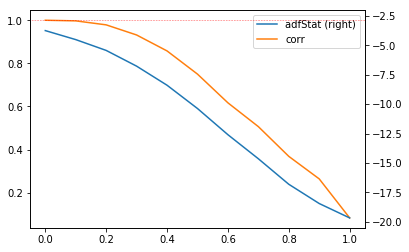

In [36]:

plotMinFFD()

In [29]:
df_raw.isnull().values.any()

False

In [30]:
#Implementing the Dickey-Fuller test here.

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [31]:
df01=fracDiff_FFD(df_raw, d=0.1,thres=0.01)
df01

,close,mid,open,volume
2015-03-03,0.797100,0.867364,0.898007,1.326306
2015-03-04,0.737470,0.723761,0.756503,1.301188
2015-03-05,0.931443,0.837579,0.754698,1.390714
2015-03-06,0.899323,0.944076,0.880600,1.291101
2015-03-09,0.813792,0.862584,0.884610,1.213196
2015-03-10,0.881192,0.867521,0.813435,1.134419
2015-03-11,0.856037,0.905969,0.874196,1.128181
2015-03-12,0.774310,0.832504,0.833621,1.260144
2015-03-13,0.854928,0.837875,0.779027,1.174404
2015-03-16,1.130547,1.014959,0.857458,1.428940


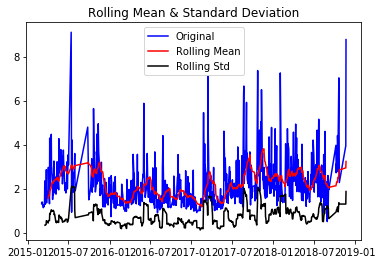

ADF Stastistic: -6.665499
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.438 
	5%: -2.865 
	10%: -2.569 


In [32]:
#As you can see, the way it's coded up, I can only check for the stationarity of a single column at once.
#This is annoying, but for research purposes it works. Different amounts of differentiation is needed for all columns
#So you ave to, by trial and error, find the best degree of fractional differentiation.
test_stationarity(df01['volume'])

In [33]:
df01

,close,mid,open,volume
2015-03-03,0.797100,0.867364,0.898007,1.326306
2015-03-04,0.737470,0.723761,0.756503,1.301188
2015-03-05,0.931443,0.837579,0.754698,1.390714
2015-03-06,0.899323,0.944076,0.880600,1.291101
2015-03-09,0.813792,0.862584,0.884610,1.213196
2015-03-10,0.881192,0.867521,0.813435,1.134419
2015-03-11,0.856037,0.905969,0.874196,1.128181
2015-03-12,0.774310,0.832504,0.833621,1.260144
2015-03-13,0.854928,0.837875,0.779027,1.174404
2015-03-16,1.130547,1.014959,0.857458,1.428940


In [34]:
df01=df01.reset_index(drop=True)
df01

,close,mid,open,volume
0,0.797100,0.867364,0.898007,1.326306
1,0.737470,0.723761,0.756503,1.301188
2,0.931443,0.837579,0.754698,1.390714
3,0.899323,0.944076,0.880600,1.291101
4,0.813792,0.862584,0.884610,1.213196
5,0.881192,0.867521,0.813435,1.134419
6,0.856037,0.905969,0.874196,1.128181
7,0.774310,0.832504,0.833621,1.260144
8,0.854928,0.837875,0.779027,1.174404
9,1.130547,1.014959,0.857458,1.428940


In [35]:
#This was a weird step. i realized some rows went missing after the differentiation process
#For that reason, I decided to delete those rows and continue anyway
mids=new_df[['mid']]
mids=mids.iloc[7:]
mids

,mid
7,1.145332
8,1.000000
9,1.096014
10,1.202363
11,1.129697
12,1.132321
13,1.171251
14,1.101155
15,1.101208
16,1.277600


In [36]:
mids=mids.reset_index(drop=True)
mids=mids.iloc[5:]
mids

,mid
5,1.132321
6,1.171251
7,1.101155
8,1.101208
9,1.277600
10,1.565589
11,1.773146
12,1.734269
13,1.939151
14,2.336112


In [37]:
mids=mids.reset_index(drop=True)

In [38]:
mids

,mid
0,1.132321
1,1.171251
2,1.101155
3,1.101208
4,1.277600
5,1.565589
6,1.773146
7,1.734269
8,1.939151
9,2.336112


In [39]:
#Training and testing data
train_df=df01.iloc[:800,:]
test_df=df01.iloc[800:,:]
train_vals=train_df.values
test_vals=test_df.values

In [40]:
#This function has been taken from Luke Tonin's post on using encoder-decoder cells for time series prediction.

def split_sequences(sequences, n_steps_in):
	X= list() #, list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		#out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x = sequences[i:end_ix, :]#, sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		#y.append(seq_y)
	return np.array(X)

In [41]:
X1=split_sequences(train_vals, 5)
X_test=split_sequences(test_vals,5)
print(X1.shape, X_test.shape)

(796, 5, 4) (29, 5, 4)


In [42]:
Y_vals=mids.iloc[:798]
Y_vals

,mid
0,1.132321
1,1.171251
2,1.101155
3,1.101208
4,1.277600
5,1.565589
6,1.773146
7,1.734269
8,1.939151
9,2.336112


In [108]:
Y_actuals=mids.iloc[799:]
Y_actuals=Y_actuals.reset_index(drop=True)

In [44]:
Y_values=Y_vals.values
Y_values

array([[ 1.13232054],
       [ 1.17125068],
       [ 1.10115543],
       [ 1.1012079 ],
       [ 1.2776003 ],
       [ 1.56558897],
       [ 1.77314647],
       [ 1.73426879],
       [ 1.93915051],
       [ 2.33611212],
       [ 2.44765591],
       [ 2.5176987 ],
       [ 2.58779396],
       [ 2.78233977],
       [ 2.5176987 ],
       [ 2.60075319],
       [ 2.91728363],
       [ 3.23381408],
       [ 3.58402803],
       [ 4.12884026],
       [ 4.35979783],
       [ 4.05365575],
       [ 4.06404412],
       [ 4.21965978],
       [ 3.19488393],
       [ 3.36613462],
       [ 3.44651331],
       [ 3.25453835],
       [ 3.51917942],
       [ 3.5165561 ],
       [ 3.25716168],
       [ 3.5710688 ],
       [ 3.6722767 ],
       [ 3.51660856],
       [ 3.68523592],
       [ 3.95501871],
       [ 3.69562429],
       [ 3.47505509],
       [ 3.15333046],
       [ 3.17415966],
       [ 3.81236228],
       [ 4.08739171],
       [ 3.91608856],
       [ 3.97841878],
       [ 4.10811599],
       [ 4

In [45]:
def Y_splitter(sequence, steps):
    p=[]
    for i in range(len(sequence)):
        end_ix=i+steps
        if end_ix>len(sequence):
            break
        seq_x=sequence[i:end_ix]
        p.append(seq_x)
    return np.array(p)

In [46]:
Y1=Y_splitter(Y_values, 3)
Y1.shape

(796, 3, 1)

In [47]:
decoder_inputs=np.zeros((Y1.shape[0], Y1.shape[1],1))
decoder_inputs.shape

(796, 3, 1)

In [48]:
X1.shape

(796, 5, 4)

In [49]:
decoder_inputs

array([[[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]]])

In [87]:
#Finally we get to the model architecture part.
import numpy as np
import keras

layers=[256,512,512,256]
learning_rate=0.01
decay=0
optimiser=keras.optimizers.Adam(lr=learning_rate, decay=decay)
num_input_features=4
num_output_features=1

loss="mse"
lambda_regulariser = 0.000001
regulariser=keras.regularizers.l2(lambda_regulariser)
#batch_size=104
steps_per_epoch=2
epochs=5000

input_sequence_length=5
target_sequence_length=3
num_steps_to_predict=3

In [88]:
encoder_inputs = keras.layers.Input(shape=(None, num_input_features))
#activation1=keras.layers.LeakyReLU()

# Create a list of RNN Cells, these are then concatenated into a single layer
# with the RNN layer.
encoder_cells = []
for hidden_neurons in layers:
    encoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                               dropout=0.25,
                                               recurrent_dropout=0.5,
                                               activation='relu',
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
    #encoder_cells.append(keras.layers.LeakyReLU(alpha=0.1))

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

# Discard encoder outputs and only keep the states.
# The outputs are of no interest to us, the encoder's
# job is to create a state describing the input sequence.
encoder_states = encoder_outputs_and_states[1:]

In [89]:
decoder_in=keras.layers.Input(shape=(None, 1))
decoder_cells=[]
#layerz=[256,512,512,256]
for hidden_neurons in layers:
    decoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                               dropout=0.25,
                                               recurrent_dropout=0.5,
                                               activation='relu',
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
                       
    #decoder_cells.append(keras.layers.LeakyReLU(alpha=0.1))
decoder=keras.layers.RNN(decoder_cells,return_sequences=True, return_state=True)

# Set the initial state of the decoder to be the ouput state of the encoder.
# This is the fundamental part of the encoder-decoder.
decoder_outputs_and_states = decoder(decoder_in, initial_state=encoder_states)

# Only select the output of the decoder (not the states)
decoder_outputs = decoder_outputs_and_states[0]

# Apply a dense layer with linear activation to set output to correct dimension
# and scale (tanh is default activation for GRU in Keras, our output sine function can be larger then 1)
decoder_dense = keras.layers.Dense(num_output_features,
                                   activation='linear',
                                   kernel_regularizer=regulariser,
                                   bias_regularizer=regulariser)

decoder_outputs = decoder_dense(decoder_outputs)

In [74]:
Y1

array([[[1.13232054],
        [1.17125068],
        [1.10115543]],

       [[1.17125068],
        [1.10115543],
        [1.1012079 ]],

       [[1.10115543],
        [1.1012079 ],
        [1.2776003 ]],

       ...,

       [[3.50349194],
        [3.37757232],
        [3.44577878]],

       [[3.37757232],
        [3.44577878],
        [3.24115939]],

       [[3.44577878],
        [3.24115939],
        [3.12048642]]])

In [91]:
model2= keras.models.Model(inputs=[encoder_inputs, decoder_in], outputs=decoder_outputs)
model2.compile(optimizer=optimiser, loss=loss)

In [92]:
history= model2.fit([X1, decoder_inputs], Y1, steps_per_epoch=steps_per_epoch, epochs=epochs, shuffle=False, verbose=1)
model2.save('path-to-your-model-directory.h5')

Epoch 1/5000
2/2 [==============================] - 7s 4s/step - loss: 8740.7073
Epoch 2/5000
2/2 [==============================] - 0s 83ms/step - loss: 24.3815
Epoch 3/5000
2/2 [==============================] - 0s 85ms/step - loss: 24.6797
Epoch 4/5000
2/2 [==============================] - 0s 85ms/step - loss: 24.7177
Epoch 5/5000
2/2 [==============================] - 0s 78ms/step - loss: 24.7358
Epoch 6/5000
2/2 [==============================] - 0s 84ms/step - loss: 24.7390
Epoch 7/5000
2/2 [==============================] - 0s 82ms/step - loss: 24.7300
Epoch 8/5000
2/2 [==============================] - 0s 78ms/step - loss: 24.7112
Epoch 9/5000
2/2 [==============================] - 0s 88ms/step - loss: 24.6841
Epoch 10/5000
2/2 [==============================] - 0s 83ms/step - loss: 24.6499
Epoch 11/5000
2/2 [==============================] - 0s 79ms/step - loss: 24.6095
Epoch 12/5000
2/2 [==============================] - 0s 83ms/step - loss: 24.5639
Epoch 13/5000
2/2 [======

2/2 [==============================] - 0s 80ms/step - loss: 0.3902
Epoch 202/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.3628
Epoch 203/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.3712
Epoch 204/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.3571
Epoch 205/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.3544
Epoch 206/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3676
Epoch 207/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.3632
Epoch 208/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.3748
Epoch 209/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.3666
Epoch 210/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.3600
Epoch 211/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.3636
Epoch 212/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3737
Epoch 213/5000
2/2 [===========

2/2 [==============================] - 0s 73ms/step - loss: 0.2990
Epoch 302/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.3062
Epoch 303/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.3349
Epoch 304/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2889
Epoch 305/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2976
Epoch 306/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.3078
Epoch 307/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2995
Epoch 308/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2956
Epoch 309/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.3182
Epoch 310/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3043
Epoch 311/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.3031
Epoch 312/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.2876
Epoch 313/5000
2/2 [===========

2/2 [==============================] - 0s 78ms/step - loss: 0.2776
Epoch 402/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2774
Epoch 403/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2842
Epoch 404/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2764
Epoch 405/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2794
Epoch 406/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2750
Epoch 407/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2797
Epoch 408/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2741
Epoch 409/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2626
Epoch 410/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2756
Epoch 411/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2614
Epoch 412/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2812
Epoch 413/5000
2/2 [===========

2/2 [==============================] - 0s 78ms/step - loss: 0.2718
Epoch 502/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2595
Epoch 503/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2634
Epoch 504/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.2604
Epoch 505/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.2738
Epoch 506/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2575
Epoch 507/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2699
Epoch 508/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2645
Epoch 509/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2649
Epoch 510/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2531
Epoch 511/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2526
Epoch 512/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2620
Epoch 513/5000
2/2 [===========

2/2 [==============================] - 0s 84ms/step - loss: 0.2565
Epoch 602/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2365
Epoch 603/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2580
Epoch 604/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2408
Epoch 605/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2317
Epoch 606/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2543
Epoch 607/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2474
Epoch 608/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2256
Epoch 609/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2488
Epoch 610/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2397
Epoch 611/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.2429
Epoch 612/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2455
Epoch 613/5000
2/2 [===========

2/2 [==============================] - 0s 74ms/step - loss: 0.2437
Epoch 702/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.2281
Epoch 703/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2209
Epoch 704/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2412
Epoch 705/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2387
Epoch 706/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2428
Epoch 707/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2554
Epoch 708/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2396
Epoch 709/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2421
Epoch 710/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2418
Epoch 711/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2319
Epoch 712/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2505
Epoch 713/5000
2/2 [===========

2/2 [==============================] - 0s 82ms/step - loss: 0.2260
Epoch 802/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2213
Epoch 803/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2338
Epoch 804/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.2352
Epoch 805/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2271
Epoch 806/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2345
Epoch 807/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2252
Epoch 808/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2214
Epoch 809/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2246
Epoch 810/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2239
Epoch 811/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2267
Epoch 812/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2405
Epoch 813/5000
2/2 [===========

2/2 [==============================] - 0s 82ms/step - loss: 0.2274
Epoch 902/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2216
Epoch 903/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2199
Epoch 904/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2223
Epoch 905/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2219
Epoch 906/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2248
Epoch 907/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2260
Epoch 908/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2280
Epoch 909/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2291
Epoch 910/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2272
Epoch 911/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2304
Epoch 912/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2245
Epoch 913/5000
2/2 [===========

2/2 [==============================] - 0s 83ms/step - loss: 0.2182
Epoch 1002/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2139
Epoch 1003/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2170
Epoch 1004/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2230
Epoch 1005/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2175
Epoch 1006/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2114
Epoch 1007/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2067
Epoch 1008/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2168
Epoch 1009/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2150
Epoch 1010/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2344
Epoch 1011/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2207
Epoch 1012/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2152
Epoch 1013/5000
2/2 

2/2 [==============================] - 0s 72ms/step - loss: 0.2126
Epoch 1198/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2182
Epoch 1199/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2020
Epoch 1200/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2134
Epoch 1201/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2233
Epoch 1202/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.2129
Epoch 1203/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2099
Epoch 1204/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2195
Epoch 1205/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2058
Epoch 1206/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2053
Epoch 1207/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.2126
Epoch 1208/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2039
Epoch 1209/5000
2/2 

2/2 [==============================] - 0s 79ms/step - loss: 0.2065
Epoch 1394/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2083
Epoch 1395/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2084
Epoch 1396/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2120
Epoch 1397/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2126
Epoch 1398/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2180
Epoch 1399/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2149
Epoch 1400/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1971
Epoch 1401/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2014
Epoch 1402/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2027
Epoch 1403/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2067
Epoch 1404/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2152
Epoch 1405/5000
2/2 

2/2 [==============================] - 0s 77ms/step - loss: 0.2021
Epoch 1590/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1916
Epoch 1591/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2030
Epoch 1592/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2110
Epoch 1593/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2013
Epoch 1594/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2080
Epoch 1595/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2019
Epoch 1596/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2013
Epoch 1597/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2029
Epoch 1598/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1939
Epoch 1599/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2052
Epoch 1600/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2017
Epoch 1601/5000
2/2 

2/2 [==============================] - 0s 77ms/step - loss: 0.1957
Epoch 1786/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1911
Epoch 1787/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1899
Epoch 1788/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1914
Epoch 1789/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1911
Epoch 1790/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1999
Epoch 1791/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1885
Epoch 1792/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1898
Epoch 1793/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1873
Epoch 1794/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1990
Epoch 1795/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1912
Epoch 1796/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.1977
Epoch 1797/5000
2/2 

2/2 [==============================] - 0s 73ms/step - loss: 0.1917
Epoch 1982/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1934
Epoch 1983/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1870
Epoch 1984/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1982
Epoch 1985/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1978
Epoch 1986/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1955
Epoch 1987/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1980
Epoch 1988/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1867
Epoch 1989/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1946
Epoch 1990/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1858
Epoch 1991/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1916
Epoch 1992/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1776
Epoch 1993/5000
2/2 

2/2 [==============================] - 0s 82ms/step - loss: 0.1908
Epoch 2178/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1823
Epoch 2179/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1940
Epoch 2180/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1939
Epoch 2181/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.1869
Epoch 2182/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1869
Epoch 2183/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1944
Epoch 2184/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1901
Epoch 2185/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1904
Epoch 2186/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1862
Epoch 2187/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1810
Epoch 2188/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1797
Epoch 2189/5000
2/2 

2/2 [==============================] - 0s 82ms/step - loss: 0.1815
Epoch 2374/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1873
Epoch 2375/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1890
Epoch 2376/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1773
Epoch 2377/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1905
Epoch 2378/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1816
Epoch 2379/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1895
Epoch 2380/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1899
Epoch 2381/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1835
Epoch 2382/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1798
Epoch 2383/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1882
Epoch 2384/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1818
Epoch 2385/5000
2/2 

2/2 [==============================] - 0s 76ms/step - loss: 0.1851
Epoch 2570/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1837
Epoch 2571/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1848
Epoch 2572/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1833
Epoch 2573/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1845
Epoch 2574/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1813
Epoch 2575/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1781
Epoch 2576/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1778
Epoch 2577/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1862
Epoch 2578/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1733
Epoch 2579/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1836
Epoch 2580/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1759
Epoch 2581/5000
2/2 

2/2 [==============================] - 0s 78ms/step - loss: 0.1836
Epoch 2766/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1810
Epoch 2767/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1826
Epoch 2768/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1830
Epoch 2769/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1738
Epoch 2770/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1737
Epoch 2771/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1722
Epoch 2772/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1833
Epoch 2773/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1829
Epoch 2774/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1703
Epoch 2775/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1719
Epoch 2776/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1673
Epoch 2777/5000
2/2 

2/2 [==============================] - 0s 73ms/step - loss: 0.1749
Epoch 2962/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1784
Epoch 2963/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1772
Epoch 2964/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1714
Epoch 2965/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1769
Epoch 2966/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1781
Epoch 2967/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1814
Epoch 2968/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1746
Epoch 2969/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1692
Epoch 2970/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.1755
Epoch 2971/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1716
Epoch 2972/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1732
Epoch 2973/5000
2/2 

2/2 [==============================] - 0s 77ms/step - loss: 0.1846
Epoch 3158/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1712
Epoch 3159/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1710
Epoch 3160/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1814
Epoch 3161/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1783
Epoch 3162/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.1871
Epoch 3163/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.1752
Epoch 3164/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1801
Epoch 3165/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1855
Epoch 3166/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1796
Epoch 3167/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1823
Epoch 3168/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.1787
Epoch 3169/5000
2/2 

2/2 [==============================] - 0s 77ms/step - loss: 0.1748
Epoch 3354/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1803
Epoch 3355/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1715
Epoch 3356/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1730
Epoch 3357/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1743
Epoch 3358/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1775
Epoch 3359/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1779
Epoch 3360/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1710
Epoch 3361/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.1819
Epoch 3362/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1826
Epoch 3363/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1770
Epoch 3364/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1692
Epoch 3365/5000
2/2 

2/2 [==============================] - 0s 73ms/step - loss: 0.1673
Epoch 3550/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1730
Epoch 3551/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1789
Epoch 3552/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.1768
Epoch 3553/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1727
Epoch 3554/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1707
Epoch 3555/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1703
Epoch 3556/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1763
Epoch 3557/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1744
Epoch 3558/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1743
Epoch 3559/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1662
Epoch 3560/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1827
Epoch 3561/5000
2/2 

2/2 [==============================] - 0s 82ms/step - loss: 0.1798
Epoch 3746/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1808
Epoch 3747/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1711
Epoch 3748/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1729
Epoch 3749/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1662
Epoch 3750/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1671
Epoch 3751/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1674
Epoch 3752/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1725
Epoch 3753/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1752
Epoch 3754/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1749
Epoch 3755/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1857
Epoch 3756/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.1648
Epoch 3757/5000
2/2 

2/2 [==============================] - 0s 77ms/step - loss: 0.1635
Epoch 3942/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1663
Epoch 3943/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1660
Epoch 3944/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1641
Epoch 3945/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1680
Epoch 3946/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1578
Epoch 3947/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1774
Epoch 3948/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1637
Epoch 3949/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1597
Epoch 3950/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1608
Epoch 3951/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1708
Epoch 3952/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1685
Epoch 3953/5000
2/2 

2/2 [==============================] - 0s 77ms/step - loss: 0.1679
Epoch 4138/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1722
Epoch 4139/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1696
Epoch 4140/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1622
Epoch 4141/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1579
Epoch 4142/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1697
Epoch 4143/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1693
Epoch 4144/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1630
Epoch 4145/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1679
Epoch 4146/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1679
Epoch 4147/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1714
Epoch 4148/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1627
Epoch 4149/5000
2/2 

2/2 [==============================] - 0s 81ms/step - loss: 0.1618
Epoch 4334/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1606
Epoch 4335/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1644
Epoch 4336/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1669
Epoch 4337/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1644
Epoch 4338/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1656
Epoch 4339/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1644
Epoch 4340/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1690
Epoch 4341/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1617
Epoch 4342/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1764
Epoch 4343/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1637
Epoch 4344/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1620
Epoch 4345/5000
2/2 

2/2 [==============================] - 0s 80ms/step - loss: 0.1692
Epoch 4530/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1600
Epoch 4531/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1741
Epoch 4532/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1666
Epoch 4533/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1591
Epoch 4534/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1660
Epoch 4535/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1575
Epoch 4536/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1600
Epoch 4537/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1645
Epoch 4538/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1629
Epoch 4539/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1669
Epoch 4540/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1668
Epoch 4541/5000
2/2 

2/2 [==============================] - 0s 83ms/step - loss: 0.1660
Epoch 4726/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1602
Epoch 4727/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1595
Epoch 4728/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1595
Epoch 4729/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1571
Epoch 4730/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1642
Epoch 4731/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1621
Epoch 4732/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1627
Epoch 4733/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1707
Epoch 4734/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1664
Epoch 4735/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1615
Epoch 4736/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1523
Epoch 4737/5000
2/2 

2/2 [==============================] - 0s 73ms/step - loss: 0.1571
Epoch 4922/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1584
Epoch 4923/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1584
Epoch 4924/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1607
Epoch 4925/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1578
Epoch 4926/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1588
Epoch 4927/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1626
Epoch 4928/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1651
Epoch 4929/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.1560
Epoch 4930/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.1586
Epoch 4931/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.1569
Epoch 4932/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1600
Epoch 4933/5000
2/2 

/home/parth/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/keras/engine/network.py:877: UserWarning: Layer rnn_7 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'rnn_6/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_3:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_4:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_5:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_6:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_7:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_8:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'rnn_6/while/Exit_9:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [93]:
X_test

array([[[2.64682382, 2.64783356, 2.61606586, 1.59613543],
        [2.45547456, 2.43949431, 2.65428234, 3.53498171],
        [2.47166888, 2.33566082, 2.30105416, 3.5461222 ],
        [9.22046696, 9.23518039, 9.23362642, 0.87900218],
        [6.53975369, 7.19943964, 7.8250442 , 2.73369633]],

       [[2.45547456, 2.43949431, 2.65428234, 3.53498171],
        [2.47166888, 2.33566082, 2.30105416, 3.5461222 ],
        [9.22046696, 9.23518039, 9.23362642, 0.87900218],
        [6.53975369, 7.19943964, 7.8250442 , 2.73369633],
        [6.4722843 , 5.34992128, 5.92324742, 4.59716709]],

       [[2.47166888, 2.33566082, 2.30105416, 3.5461222 ],
        [9.22046696, 9.23518039, 9.23362642, 0.87900218],
        [6.53975369, 7.19943964, 7.8250442 , 2.73369633],
        [6.4722843 , 5.34992128, 5.92324742, 4.59716709],
        [5.78316049, 5.5747939 , 5.08283143, 2.90690066]],

       [[9.22046696, 9.23518039, 9.23362642, 0.87900218],
        [6.53975369, 7.19943964, 7.8250442 , 2.73369633],
        

In [94]:
X_decoder_test=np.zeros((X_test.shape[0], 3,1))
X_decoder_test.shape

(29, 3, 1)

In [95]:
y_predicted=model.predict([X_test,X_decoder_test])

In [96]:
y_predicted.shape

(29, 3, 1)

In [97]:
y_predicted=y_predicted.reshape((29,3))

In [98]:
predd=pd.DataFrame(y_predicted, columns=['day1','day2','day3'])
predd

,day1,day2,day3
0,1.148319,1.189594,0.760246
1,6.472678,6.764491,6.564094
2,5.599730,5.520020,5.458186
3,5.413185,5.263210,5.217715
4,4.915405,4.913817,4.968568
5,5.214616,5.244532,5.287455
6,4.967364,4.963145,4.969122
7,5.161367,5.136241,5.134332
8,4.868539,4.869893,4.877564
9,4.813562,4.826688,4.855477


In [102]:
predd=predd.drop([0])
predd=predd.reset_index(drop=True)
predd

,day1,day2,day3
0,6.472678,6.764491,6.564094
1,5.599730,5.520020,5.458186
2,5.413185,5.263210,5.217715
3,4.915405,4.913817,4.968568
4,5.214616,5.244532,5.287455
5,4.967364,4.963145,4.969122
6,5.161367,5.136241,5.134332
7,4.868539,4.869893,4.877564
8,4.813562,4.826688,4.855477
9,4.406491,4.391284,4.385799


In [103]:
preds1=predd['day1'].values
preds3=predd['day3'].values

In [104]:
preds2=predd['day2'].values

No handles with labels found to put in legend.


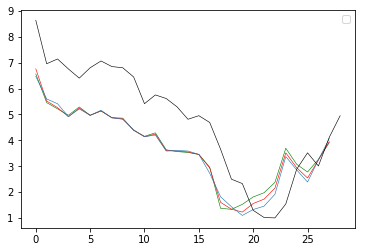

In [109]:
plt.plot(preds3, linewidth=0.6, color='g')

plt.plot(preds2, linewidth=0.6, color='r')
plt.plot(preds1, linewidth=0.6)
plt.plot(Y_actuals, linewidth=0.6, color='black')
plt.savefig('/home/parth/Pictures/p.i.m.p_2_model3_part4.png', dpi=1200)
plt.legend()
plt.show()

In [ ]:
#As you can see, I tried to predict the next 3 days of prices using the previous 5 day mid-open-close and volume values.
#It has some prediction value, but I didn't end up using it for my purposes. 
#The whole purpose of this was to try the encoder-decoder cells architecture to try to solve a problem which is very tricky.
#I plan to revisit this architecture to predict prices in the future, using different combinations, and perhaps 
#skipping the fractional differentiation functions. 